# PROYECTO 3. Prueba Técnica de Análisis de Producto (IronHack Delivery)
**Grupo 8**

Autores: Elena, Fernando, Adive

## 1. KPIs (25 puntos)
En tu opinión, ¿cuáles son los tres principales KPIs para IronHack Delivery? Clasificados por orden de importancia decreciente. Explica tu elección y trata de hacer una estimación fundamentada de su valor. Proporciona una explicación paso a paso de tu estimación. ¿Cómo los mejorarías? Nota: Ignora los KPIs financieros puros que aplican a todos los negocios.

## 3. Experimento (25 puntos)
Nos gustaría medir el impacto de aumentar la tarifa de entrega de pedidos en una ciudad dada (sin considerar el valor de los productos), de €1.9 a €2.1, en los KPIs de la empresa.

Se te pide diseñar el experimento desde la etapa conceptual, planificar el análisis empírico y presentar las recomendaciones según los resultados del experimento.

Explica en detalle cómo abordarías esta tarea, enfocándote en lo siguiente:

- ¿Qué tipo de prueba requeriría esto?

*Prueba A/B Test. Tendremos grupo de "Control" y "Tratamiento"

El experimento utilizaría una prueba A/B en la que:
> Grupo A (Control): Pagaría la tarifa de entrega actual de €1.9.

> Grupo B (Tratamiento): Pagaría la tarifa de entrega aumentada de €2.1.

Este diseño nos permitiría evaluar el impacto de la tarifa de entrega incrementada en los KPIs sin que otras variables influyan significativamente en los resultados.*

- ¿Probarías esto solo en nuevos usuarios o en todos los usuarios activos? ¿Por qué?

*Realizaría la prueba en todos los usuarios activos (nuevos y recurrentes). Las razones son:
Los usuarios recurrentes pueden tener comportamientos diferentes respecto a cambios en costos (por ejemplo, más sensibilidad a precios), lo cual podría revelar si el aumento afecta a los clientes leales.
Incluir nuevos usuarios permite medir el efecto en la adquisición y el comportamiento de los clientes recién captados.
Dado que queremos medir el impacto en los KPIs generales, es fundamental abarcar todo el espectro de usuarios activos.*

- ¿Qué suposiciones harías y cómo probarías si estas suposiciones son correctas?

*Si se incrementa la tarifa de entrega igual podría tener un impacto negativo a la hora de compra y podría haber muchos "carritos abandonados". Por otro lado, como la diferencia de precio es de 20 céntimos igualmente no tendría porque afectar este aumento de precio.
Otro efecto que puede impactar es cuando haya eventos donde haya una alta demanda o factores externos (como promociones), ya que podrían influir en el impacto de la tarifa. Intentaríamos realizar el experimento durante un período estable, sin eventos estacionales importantes, para minimizar estas variables.
Podríamos hacer la prueba en algunas ciudades en España, primero Barcelona y después Madrid y medir la diferencia.*

- ¿Qué enfoque usarías para determinar la duración del experimento?

*Proponemos hacer la prueba por 1 mes ya que durante este periodo el flujo de dinero de los usuarios va variando desde que pagan hasta que vuelven a pagar. Además que en los fines de semana se suele gastar más.*

- ¿Qué KPIs/métricas elegirías para evaluar el éxito de la prueba?

*1. Customer Lifetime Value (CTLV): esta métrica nos ayudaría a medir la fidelidad de los usuarios en un periodo determinado con base al aumento de tarifa de envío*

*2. Average Order Value: está métrica nos indica la cantidad media que los clientes gastan por pedido durante un determinado período de tiempo. Esto nos daría una idea del comportamiento de usuario por temporadas y ver si hay factores externos que influyan en esto o no.*

*3. Churn Rate (Tasa de cancelación): esta métrica nos ayudaría a medir si frecuencia de cancelaciones aumentaría con el cambio de tarifa.*

- ¿Qué pasos tomarías para analizar los resultados de la prueba?

*1. Comparación estadística de grupos (Control vs Tratamiento): Ejecutaríamos pruebas t de dos muestras para comparar los KPIs seleccionados entre los grupos de control y tratamiento.*
*2. Análisis de subgrupos: Examinaríamos el efecto del cambio en diferentes segmentos de usuarios (nuevos vs. recurrentes, alta frecuencia de pedidos vs. baja frecuencia) para entender el impacto diferencial.*
*3. Análisis de retención: Con datos longitudinales de los usuarios, se podría utilizar análisis de cohortes para ver si el aumento afecta la retención de clientes a lo largo del tiempo.*

- ¿Cuáles serían tus recomendaciones según los resultados de la prueba?

*Si los resultados de la prueba A/B tienen un impacto significativo con las condiciones descritas anteriormente, es decir en un intervalo de 1 mes en las ciudades de Barcelona y Madrid, podría hacerse una expansión a otras ciudades o países de una forma escalada y seguir analizando estos pilotos para asegurarnos que se cumplen los KPIs*

In [6]:
import pandas as pd

# Read csv with new headers
df_orders = pd.read_csv("./project_dataset/python_raw_data/fake_orders_test_h.csv")
df_orders['activation_time_local'] = pd.to_datetime(df_orders['activation_time_local'])
df_orders['activation_time_local']
df_orders

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
0,33557880,2019-03-10 23:59:59,AR,14200,DeliveredStatus,PAID,1,4.54,8.64
1,33512615,2019-03-10 23:58:32,TR,28725,DeliveredStatus,PAID,1,3.76,3.76
2,33512451,2019-03-10 23:57:56,TR,28725,DeliveredStatus,PAID,1,2.86,2.86
3,33530892,2019-03-10 23:57:33,ES,19777,CanceledStatus,PAID,1,12.95,0.00
4,33557765,2019-03-10 23:57:21,AR,34565,DeliveredStatus,PAID,2,2.86,6.48
...,...,...,...,...,...,...,...,...,...
60395,31960607,2019-03-01 00:04:31,TR,68820,DeliveredStatus,PAID,2,10.17,10.33
60396,32002079,2019-03-01 00:03:53,AR,50175,CanceledStatus,PAID,1,3.80,0.00
60397,32002046,2019-03-01 00:03:06,AR,55159,DeliveredStatus,PAID,1,4.24,4.91
60398,32001950,2019-03-01 00:01:01,AR,62504,CanceledStatus,PAID,1,4.91,0.00


In [7]:
import numpy as np

np.random.seed(42)  # Para reproducibilidad
# Crear una columna aleatoria para asignar pedidos al grupo de control (tarifa de €1.9) o tratamiento (tarifa de €2.1)
df_orders['group'] = np.random.choice(['control', 'treatment'], size=len(df_orders), p=[0.5, 0.5])

# Asignar la tarifa de entrega según el grupo
df_orders['delivery_fee'] = np.where(df_orders['group'] == 'control', 1.9, 2.1)
df_orders['final_price_experiment'] = df_orders['products_total'] + df_orders['delivery_fee']
df_orders

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,group,delivery_fee,final_price_experiment
0,33557880,2019-03-10 23:59:59,AR,14200,DeliveredStatus,PAID,1,4.54,8.64,control,1.9,6.44
1,33512615,2019-03-10 23:58:32,TR,28725,DeliveredStatus,PAID,1,3.76,3.76,treatment,2.1,5.86
2,33512451,2019-03-10 23:57:56,TR,28725,DeliveredStatus,PAID,1,2.86,2.86,treatment,2.1,4.96
3,33530892,2019-03-10 23:57:33,ES,19777,CanceledStatus,PAID,1,12.95,0.00,treatment,2.1,15.05
4,33557765,2019-03-10 23:57:21,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,control,1.9,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...
60395,31960607,2019-03-01 00:04:31,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,treatment,2.1,12.27
60396,32002079,2019-03-01 00:03:53,AR,50175,CanceledStatus,PAID,1,3.80,0.00,control,1.9,5.70
60397,32002046,2019-03-01 00:03:06,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,control,1.9,6.14
60398,32001950,2019-03-01 00:01:01,AR,62504,CanceledStatus,PAID,1,4.91,0.00,control,1.9,6.81


In [8]:
df_orders.group.value_counts(normalize=True) # Aquí comprobamos que hay 50% de cada tipo

group
control      0.500232
treatment    0.499768
Name: proportion, dtype: float64

In [139]:
from scipy.stats import ttest_ind

# Creando muestra para grupos A y B
group_A = df_orders[df_orders['group'] == "control"]['final_price_experiment'].values
group_B = df_orders[df_orders['group'] == "treatment"]['final_price_experiment'].values

# Creando t test
t_stat, p_value = ttest_ind(group_A, group_B)

print("A/B TEST\n")

# Evaluando significancia entre medias
if p_value < 0.05:
    print(f"P-Value: {p_value:.4f} < 0.05. La diferencia en medias es significativa, rechazamos la hipótesis nula de que no hay diferencia entre los dos grupos")
else:
    print(f"P-Value: {p_value:.4f} >= 0.05. La diferencia en medias no es significativa")

print(f"T-statistic: {t_stat}")

A/B TEST

P-Value: 0.0020 < 0.05. La diferencia en medias es significativa, rechazamos la hipótesis nula de que no hay diferencia entre los dos grupos
T-statistic: -3.0875576805046556


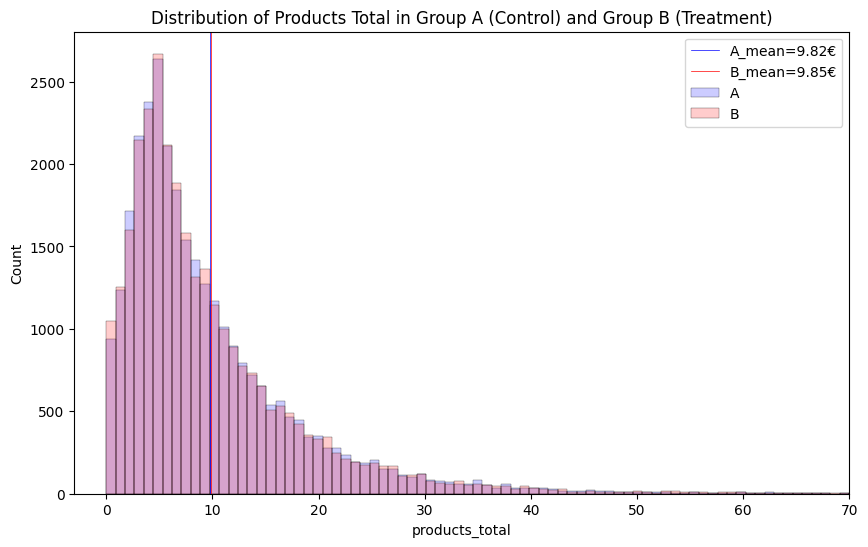

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=df_orders[df_orders['group'] == "control"], x='products_total' , bins=250, color='blue', label='A', alpha=0.2)
sns.histplot(data=df_orders[df_orders['group'] == "treatment"], x='products_total' , bins=250, color='red', label='B', alpha=0.2)

mean_A = df_orders[df_orders['group'] == "control"]['products_total'].mean()
mean_B = df_orders[df_orders['group'] == "treatment"]['products_total'].mean()
plt.axvline(mean_A, color='blue', lw=.5, label=f'A_mean={mean_A:.2f}€')
plt.axvline(mean_B, color='red', lw=.5, label=f'B_mean={mean_B:.2f}€')
plt.legend(loc='upper right')
plt.xlim([-3,70])
plt.title("Distribution of Products Total in Group A (Control) and Group B (Treatment)")
plt.show()


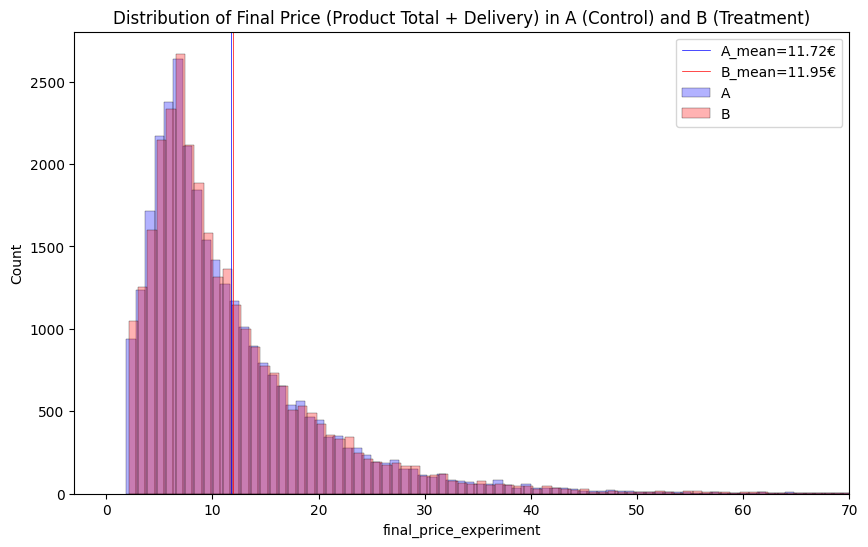

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=df_orders[df_orders['group'] == "control"], x='final_price_experiment' , bins=250, color='blue', label='A', alpha=0.3)
sns.histplot(data=df_orders[df_orders['group'] == "treatment"], x='final_price_experiment' , bins=250, color='red', label='B', alpha=0.3)

mean_A = df_orders[df_orders['group'] == "control"]['final_price_experiment'].mean()
mean_B = df_orders[df_orders['group'] == "treatment"]['final_price_experiment'].mean()
plt.axvline(mean_A, color='blue', lw=.5, label=f'A_mean={mean_A:.2f}€')
plt.axvline(mean_B, color='red', lw=.5, label=f'B_mean={mean_B:.2f}€')
plt.legend(loc='upper right')
plt.xlim([-3,70])
plt.title("Distribution of Final Price (Product Total + Delivery) in A (Control) and B (Treatment)")

plt.show()

In [ ]:
11.72 - 9.82 # La diferencia de medias entre ambas gráficas es el añadido del delivery 1.9€

1.9000000000000004

In [ ]:
11.95 - 9.85 # La diferencia de medias entre ambas gráficas es el añadido del delivery 2.1€

2.0999999999999996

In [25]:
sorted(df_orders['activation_time_local'])[-1] - sorted(df_orders['activation_time_local'])[0]

Timedelta('9 days 23:58:59')

In [31]:
sorted(df_orders['activation_time_local'])[0]

Timestamp('2019-03-01 00:01:00')

In [32]:
sorted(df_orders['activation_time_local'])[-1]

Timestamp('2019-03-10 23:59:59')

In [39]:
df_orders['activation_time_local_day'] = df_orders['activation_time_local'].dt.to_period('D').astype(str)
df_orders['activation_time_local_day']

0        2019-03-10
1        2019-03-10
2        2019-03-10
3        2019-03-10
4        2019-03-10
            ...    
60395    2019-03-01
60396    2019-03-01
60397    2019-03-01
60398    2019-03-01
60399    2019-03-01
Name: activation_time_local_day, Length: 60400, dtype: object

In [52]:
pivot_df = df_orders.groupby(['activation_time_local_day', 'group'])['final_price_experiment'].agg('mean').reset_index()
pivot_df = pivot_df.pivot_table(index=['activation_time_local_day'], columns='group', values='final_price_experiment', fill_value=0)
pivot_df

group,control,treatment
activation_time_local_day,,
2019-03-01,11.986464,12.392538
2019-03-02,12.111154,12.530273
2019-03-03,12.147527,11.934021
2019-03-04,11.394982,11.341185
2019-03-05,11.417313,11.223180
2019-03-06,10.857356,11.512428
2019-03-07,10.976166,11.301028
2019-03-08,12.573586,12.686272
2019-03-09,11.612820,11.954622


Text(0.5, 1.0, 'AOV per Day and Group')

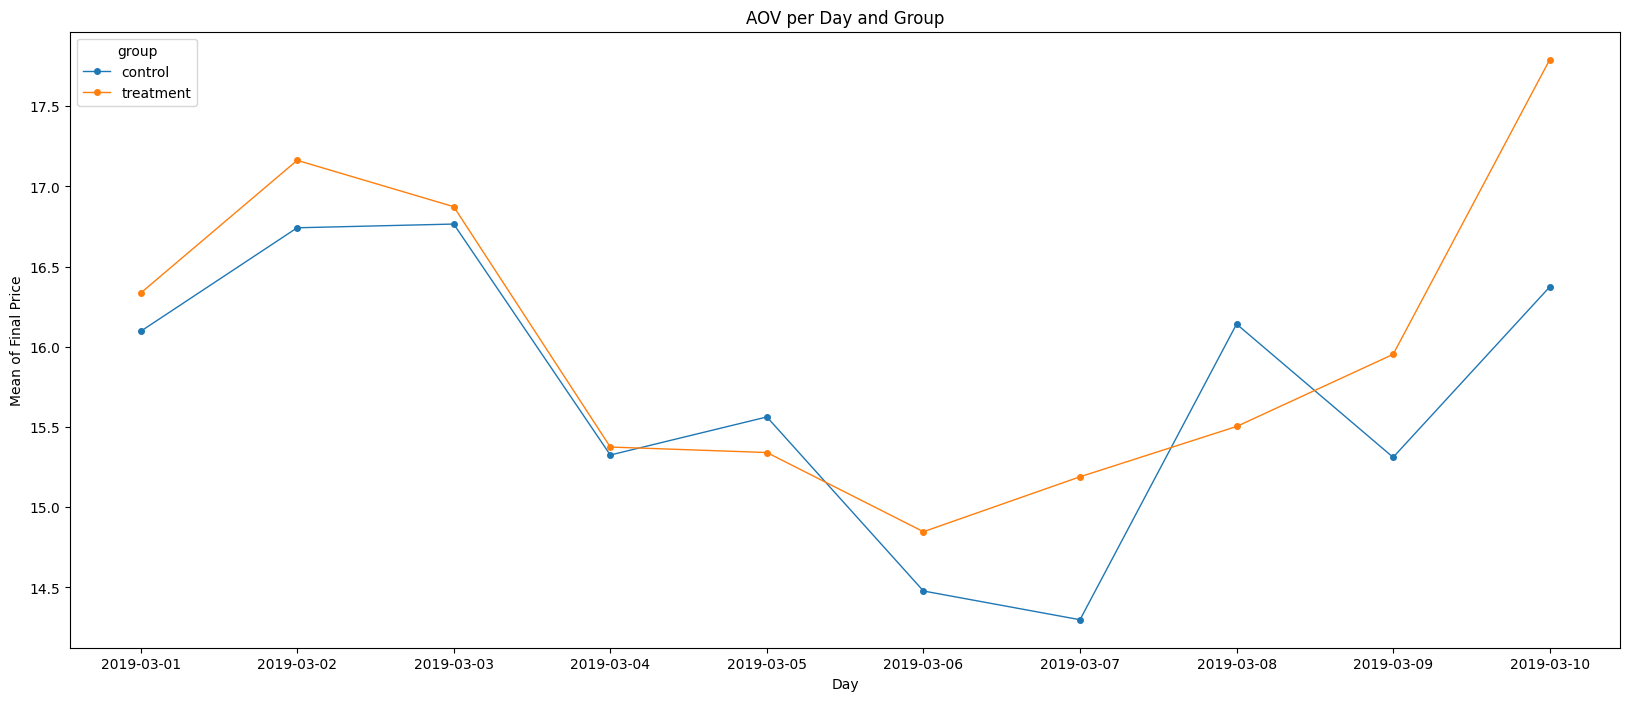

In [73]:
fig, ax = plt.subplots(1, figsize=(20,8))
pivot_df.plot(kind="line", linewidth=1, marker='o', markersize=4, ax=ax)

handles, labels = ax.get_legend_handles_labels()

plt.xlabel("Day")
plt.ylabel("Mean of Final Price")
plt.xticks(ticks=range(len(pivot_df.index)), labels=pivot_df.index)

plt.title("AOV per Day and Group")

In [59]:
df_orders

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,group,delivery_fee,final_price_experiment,activation_time_local_day
0,33557880,2019-03-10 23:59:59,AR,14200,DeliveredStatus,PAID,1,4.54,8.64,control,1.9,6.44,2019-03-10
1,33512615,2019-03-10 23:58:32,TR,28725,DeliveredStatus,PAID,1,3.76,3.76,treatment,2.1,5.86,2019-03-10
2,33512451,2019-03-10 23:57:56,TR,28725,DeliveredStatus,PAID,1,2.86,2.86,treatment,2.1,4.96,2019-03-10
3,33530892,2019-03-10 23:57:33,ES,19777,CanceledStatus,PAID,1,12.95,0.00,treatment,2.1,15.05,2019-03-10
4,33557765,2019-03-10 23:57:21,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,control,1.9,4.76,2019-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60395,31960607,2019-03-01 00:04:31,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,treatment,2.1,12.27,2019-03-01
60396,32002079,2019-03-01 00:03:53,AR,50175,CanceledStatus,PAID,1,3.80,0.00,control,1.9,5.70,2019-03-01
60397,32002046,2019-03-01 00:03:06,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,control,1.9,6.14,2019-03-01
60398,32001950,2019-03-01 00:01:01,AR,62504,CanceledStatus,PAID,1,4.91,0.00,control,1.9,6.81,2019-03-01


In [88]:
pivot_df = df_orders.groupby(['activation_time_local_day', 'group', 'country_code'])['final_price_experiment'].agg('mean').reset_index()
sorted_pivot_df = pivot_df.sort_values('final_price_experiment', ascending=False)
sorted_pivot_df

,activation_time_local_day,group,country_code,final_price_experiment
79,2019-03-02,treatment,PR,50.120000
15,2019-03-01,control,PR,33.000000
329,2019-03-08,treatment,RO,23.177186
282,2019-03-07,treatment,KE,22.792500
308,2019-03-08,control,RO,22.436828
...,...,...,...,...
1,2019-03-01,control,CL,2.034000
208,2019-03-06,control,CL,2.029556
334,2019-03-09,control,CL,2.027344
250,2019-03-07,control,CL,2.006136


In [94]:
pivot_df = df_orders.groupby(['activation_time_local_day', 'group', 'country_code'])['final_price_experiment'].agg('mean').reset_index()
pivot_df = pivot_df.pivot_table(index=['activation_time_local_day'], columns=['group','country_code'], values='final_price_experiment', fill_value=0)
pivot_df.T

activation_time_local_day  2019-03-01  2019-03-02  2019-03-03  2019-03-04  \
group     country_code                                                      
control   AR                 8.798286    8.455510    8.581595    8.600169   
          CL                 2.034000    2.042667    2.046078    2.048485   
          CR                12.157692   11.329825   13.192388   12.111351   
          DO                 7.377143    7.941304    8.775385    7.217083   
          EC                 9.831850   10.454267   11.157889   10.772458   
          EG                 6.903896    6.356933    6.185789    6.577101   
          ES                16.096425   16.742053   16.765293   15.325446   
          FR                17.502283   16.229811   17.794867   16.572404   
          GE                 9.896053    7.829167    8.459189    7.714000   
          GT                11.755600   13.558667   15.151379   12.510000   
          IT                18.387158   18.445401   17.169726   14.765986   
          KE                 9.567000   19.816667   16.786000   10.732000   
          MA                13.479167   12.072388   13.699640   12.531818   
          PA                16.833750   14.403556   21.057111   16.590811   
          PE                11.475415   14.254838   14.512145   12.495333   
          PR                33.000000    7.730000    0.000000    0.000000   
          PT                10.711250   11.838542   11.276327   11.003784   
          RO                15.826048   12.063028   11.370795   13.418382   
          TR                 6.721502    6.568512    6.720115    6.539420   
          UA                11.704089   11.897299   12.808786   10.057413   
          UY                14.324615   14.051667   14.958182   15.560909   
treatment AR                 8.744119    8.736466    8.521581    8.635085   
          BR                 5.750000    0.000000    0.000000    0.000000   
          CI                 0.000000    0.000000    0.000000    0.000000   
          CL                 2.242143    2.212676    2.231250    2.248667   
          CR                12.704000   12.672632   14.021290   10.039630   
          DO                 8.113824    9.617419   11.660769    5.682500   
          EC                10.267899   10.646450   11.308556   10.113220   
          EG                 7.850270    6.780260    7.211887    6.931463   
          ES                16.334835   17.162534   16.873627   15.375252   
          FR                15.838333   17.712830   16.670597   15.396559   
          GE                 8.502069    8.623333    9.955185    6.856364   
          GT                11.649118   14.924400   13.082632   10.286087   
          IT                20.277241   17.297622   16.187799   17.466276   
          KE                16.356667    9.403333    9.628000   11.262500   
          MA                14.452656   12.082152   13.276098   11.619452   
          PA                13.758276   15.165366   19.634884   16.282250   
          PE                13.101476   15.158403   14.702500   12.050224   
          PR                22.210000   50.120000   14.600000    0.000000   
          PT                13.762800   12.788095   12.680513   11.125806   
          RO                18.901232   14.381774   13.046771   13.025091   
          TR                 6.779015    7.341121    6.849608    6.548810   
          UA                12.080842   12.460000   11.090142   11.480887   
          UY                13.186000   14.970000    9.685714   11.832500   

activation_time_local_day  2019-03-05  2019-03-06  2019-03-07  2019-03-08  \
group     country_code                                                      
control   AR                 8.879431    7.740486    7.713870    8.779355   
          CL                 2.034167    2.029556    2.006136    2.061023   
          CR                10.144000   10.484063   10.086458   11.772877   
          DO                 7.187059    7.900000    9.316296    8.50307

In [114]:
top5_mean_AOV_countries = sorted_pivot_df['country_code'].unique()[0:5].tolist()
top5_mean_AOV_countries

['PR', 'RO', 'KE', 'PA', 'IT']

In [ ]:
pivot_df_AOV_top5 = df_orders[df_orders['country_code'].isin(top5_mean_AOV_countries)].groupby(['activation_time_local_day', 'group', 'country_code'])['final_price_experiment'].agg('mean').reset_index()
pivot_df_AOV_top5

,activation_time_local_day,group,country_code,final_price_experiment
0,2019-03-01,control,IT,18.387158
1,2019-03-01,control,KE,9.567000
2,2019-03-01,control,PA,16.833750
3,2019-03-01,control,PR,33.000000
4,2019-03-01,control,RO,15.826048
...,...,...,...,...
90,2019-03-10,treatment,IT,19.025222
91,2019-03-10,treatment,KE,14.056667
92,2019-03-10,treatment,PA,15.008143
93,2019-03-10,treatment,PR,17.816000


Si analizamos por países:

Text(0.5, 1.0, 'AOV per Day, Group in TOP 5 Countries')

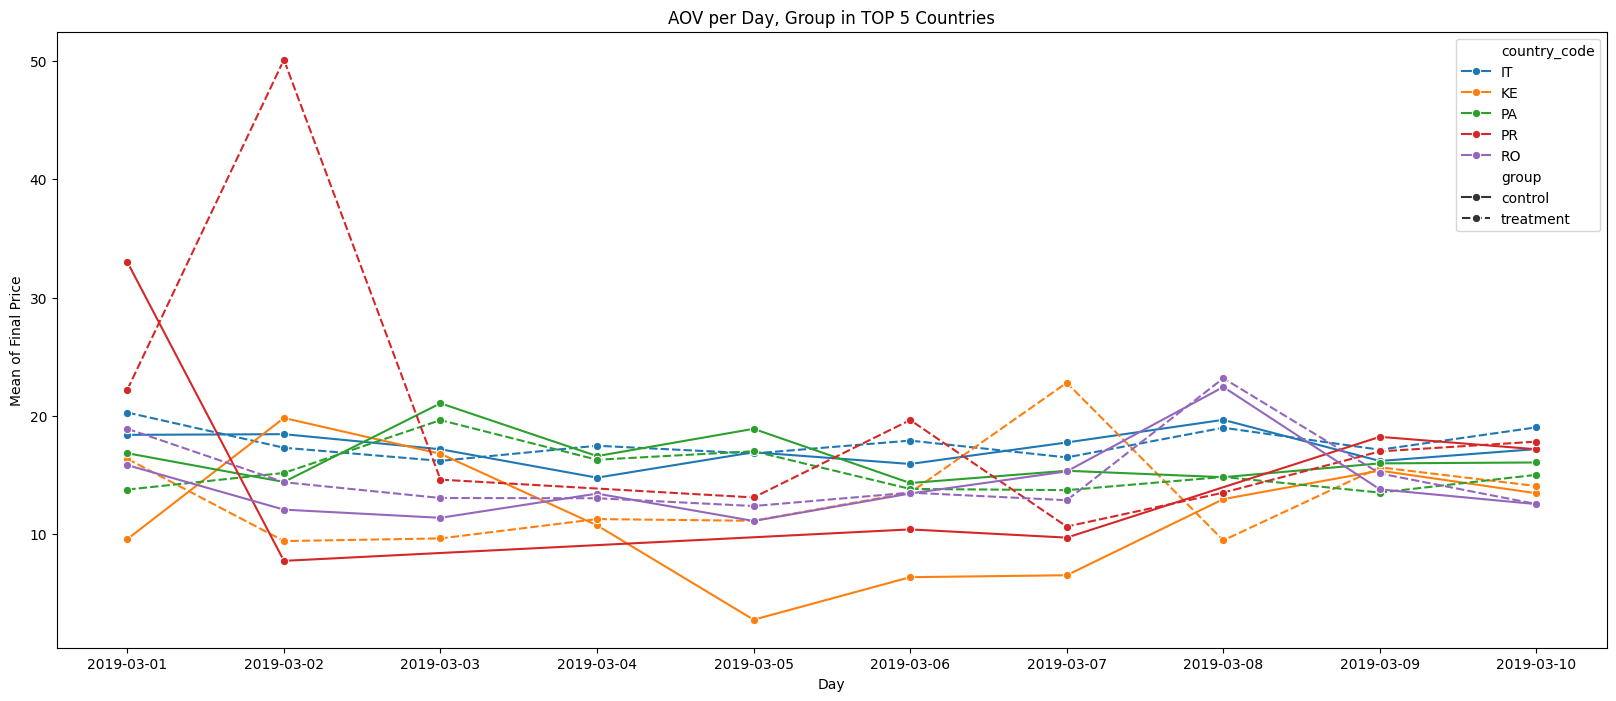

In [137]:
fig, ax = plt.subplots(1, figsize=(20,8))
sns.lineplot(data=pivot_df_AOV_top5, x='activation_time_local_day',y='final_price_experiment',hue='country_code', style='group', marker='o', markersize=6)

handles, labels = ax.get_legend_handles_labels()

plt.xlabel("Day")
plt.ylabel("Mean of Final Price")

plt.title("AOV per Day, Group in TOP 5 Countries")


Si analizamos solo el país de España:

In [66]:
pivot_df = df_orders[df_orders['country_code']=="ES"].groupby(['activation_time_local_day', 'group'])['final_price_experiment'].agg('mean').reset_index()
pivot_df = pivot_df.pivot_table(index=['activation_time_local_day'], columns='group', values='final_price_experiment', fill_value=0)
pivot_df

group,control,treatment
activation_time_local_day,,
2019-03-01,16.096425,16.334835
2019-03-02,16.742053,17.162534
2019-03-03,16.765293,16.873627
2019-03-04,15.325446,15.375252
2019-03-05,15.562767,15.341068
2019-03-06,14.477811,14.847339
2019-03-07,14.298699,15.189833
2019-03-08,16.141803,15.503318
2019-03-09,15.311271,15.953017


Text(0.5, 1.0, 'AOV per Day and Group in Spain')

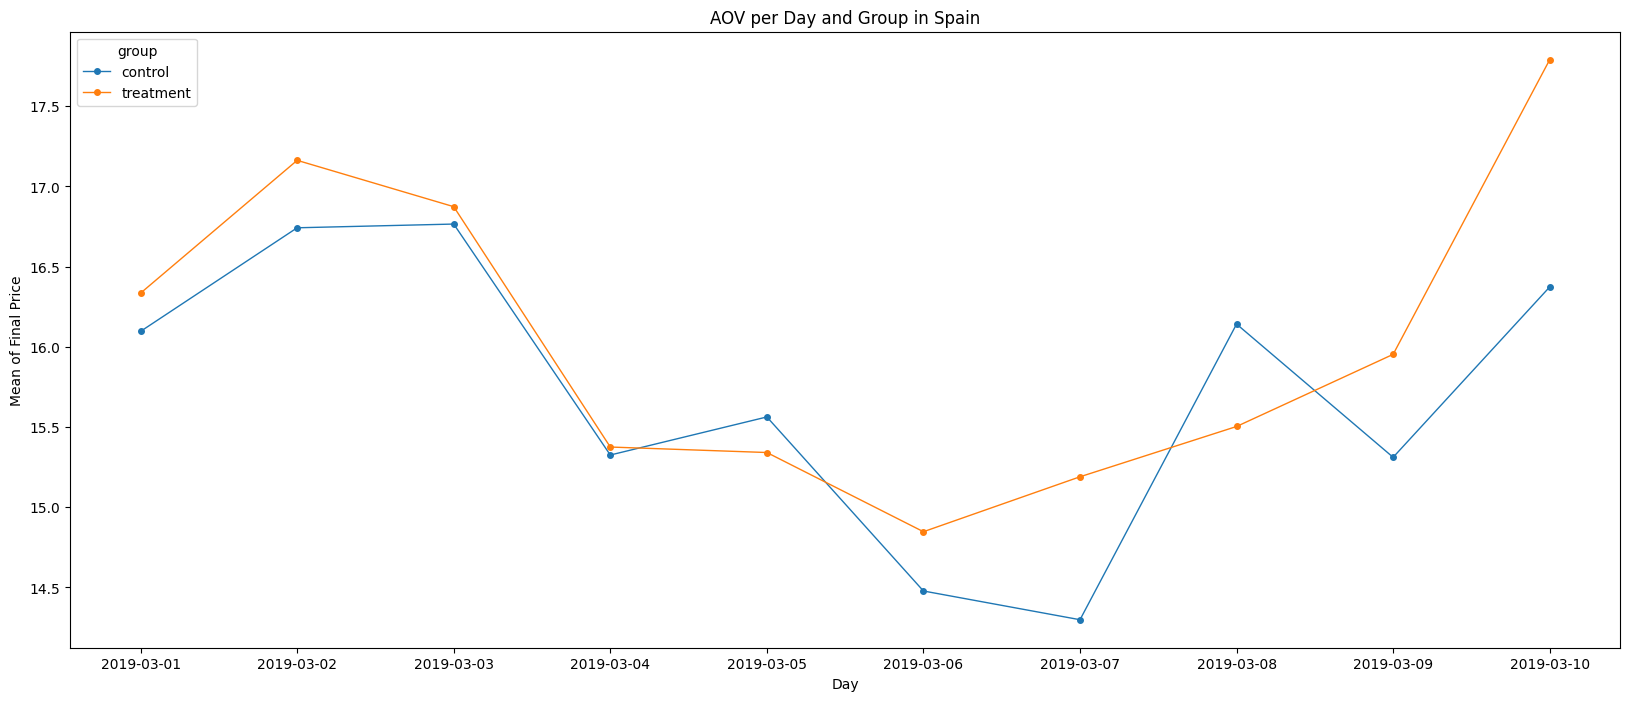

In [72]:
fig, ax = plt.subplots(1, figsize=(20,8))
pivot_df.plot(kind="line", linewidth=1, marker='o', markersize=4, ax=ax)

handles, labels = ax.get_legend_handles_labels()

plt.xlabel("Day")
plt.ylabel("Mean of Final Price")
plt.xticks(ticks=range(len(pivot_df.index)), labels=pivot_df.index)

plt.title("AOV per Day and Group in Spain")

## 4. Análisis Exploratorio de Datos (Ejercicio de Programación Estadística) (25 puntos)
Te han dado un conjunto de datos sobre pedidos provenientes de socios falsos en la aplicación. Los socios falsos son las tiendas que no están integradas directamente con IronHack Delivery, por lo que nuestro equipo de contenido gestiona su catálogo de productos y precios por ellos. Los pedidos de socios falsos se cobran al cliente al momento de la entrega y en muchos casos hay una discrepancia entre el monto total en el checkout de la app (products_total) y lo que el repartidor paga en la tienda (purchase_total_price), causando muchos problemas. 

Cuando el **products_total** es menor que el **purchase_total_price**, los llamamos *pedidos subautorizados*, de lo contrario, es un *pedido correctamente autorizado*. Queremos pasar del modelo de cobro a la entrega a un modelo de autorización y captura, pero primero necesitamos entender la fluctuación de precios de los pedidos anteriores para conocer el riesgo de hacerlo.

Descripción del conjunto de datos:
- order_id
- activation_time_local: hora local en que se activó el pedido
- country_code
- store_address
- final_status
- payment_status
- products: número de productos en el pedido
- products_total: monto total en el checkout (€)
- purchase_total_price: monto que el repartidor pagó en la tienda (€)

Tu tarea es realizar un proceso de Análisis Exploratorio de Datos (EDA) (R/Python) con estos datos para responder las siguientes preguntas:

- 1.- ¿Qué porcentaje de pedidos están subautorizados?
- 2.- ¿Qué porcentaje de pedidos se autorizarían correctamente con una autorización incremental (+20%) sobre el monto en el checkout?
- 3.- ¿Hay diferencias cuando se dividen por país?
- 4.- Para el resto de pedidos que quedarían fuera de la autorización incremental, ¿qué valores serían necesarios para capturar el monto restante?
- 5.- ¿Qué tiendas son las más problemáticas en términos de pedidos y valor monetario?
- 6.- Para los pedidos subautorizados, ¿hay una correlación entre la diferencia en los precios y la cancelación del pedido? En otras palabras: ¿Es más - probable que se cancele un pedido a medida que aumenta la diferencia de precio?


In [1]:
import pandas as pd

# Read csv
# fake_orders_test = pd.read_csv("./project_dataset/python_raw_data/fake_orders_test.csv",
                                #  names=['order_id', 'activation_time_local', 'country_code', 'store_address', 'final_status',
                                #         'payment_status', 'products', 'products_total', 'purchase_total_price'])

# Dump csv with headers
# fake_orders_test.to_csv("./project_dataset/python_raw_data/fake_orders_test_h.csv", index=None)

# Read csv with new headers
df_fake = pd.read_csv("./project_dataset/python_raw_data/fake_orders_test_h.csv")

In [2]:
df_fake

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
0,33557880,2019-03-10 23:59:59.000000,AR,14200,DeliveredStatus,PAID,1,4.54,8.64
1,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76
2,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86
3,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00
4,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48
...,...,...,...,...,...,...,...,...,...
60395,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33
60396,32002079,2019-03-01 00:03:53.000000,AR,50175,CanceledStatus,PAID,1,3.80,0.00
60397,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91
60398,32001950,2019-03-01 00:01:01.000000,AR,62504,CanceledStatus,PAID,1,4.91,0.00


### EDA

In [3]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60400 entries, 0 to 60399
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               60400 non-null  int64  
 1   activation_time_local  60400 non-null  object 
 2   country_code           60400 non-null  object 
 3   store_address          60400 non-null  int64  
 4   final_status           60400 non-null  object 
 5   payment_status         60400 non-null  object 
 6   products               60400 non-null  int64  
 7   products_total         60400 non-null  float64
 8   purchase_total_price   60400 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 4.1+ MB


In [4]:
# Añadimos una columna con la diferencia entre products_total y purchase_total_price
df_fake['price_difference'] = df_fake['products_total'] - df_fake['purchase_total_price']
df_fake['authorized'] = df_fake['price_difference'] >= 0
df_fake

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,price_difference,authorized
0,33557880,2019-03-10 23:59:59.000000,AR,14200,DeliveredStatus,PAID,1,4.54,8.64,-4.10,False
1,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76,0.00,True
2,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86,0.00,True
3,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00,12.95,True
4,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,-3.62,False
...,...,...,...,...,...,...,...,...,...,...,...
60395,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,-0.16,False
60396,32002079,2019-03-01 00:03:53.000000,AR,50175,CanceledStatus,PAID,1,3.80,0.00,3.80,True
60397,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,-0.67,False
60398,32001950,2019-03-01 00:01:01.000000,AR,62504,CanceledStatus,PAID,1,4.91,0.00,4.91,True


In [5]:
# Cambiamos el tipo de dato para que esté como categoría
df_fake['store_address'] = df_fake['store_address'].apply(str)

type(df_fake['activation_time_local'][0]) # str
# Como la columna 'activation_time_local' tiene formato string, hay que pasarlo a datetime
df_fake['activation_time_local'] = pd.to_datetime(df_fake['activation_time_local'])
df_fake['activation_time_local']

0       2019-03-10 23:59:59
1       2019-03-10 23:58:32
2       2019-03-10 23:57:56
3       2019-03-10 23:57:33
4       2019-03-10 23:57:21
                ...        
60395   2019-03-01 00:04:31
60396   2019-03-01 00:03:53
60397   2019-03-01 00:03:06
60398   2019-03-01 00:01:01
60399   2019-03-01 00:01:00
Name: activation_time_local, Length: 60400, dtype: datetime64[ns]

#### Find NaN

In [6]:
#  Se puede observar que no hay datos nulos o NaN
df_fake.isnull().sum()

order_id                 0
activation_time_local    0
country_code             0
store_address            0
final_status             0
payment_status           0
products                 0
products_total           0
purchase_total_price     0
price_difference         0
authorized               0
dtype: int64

#### value_counts() and unique()

In [7]:
# Para hacernos una idea de los datos que hay, de los valores nulos, y de los valores que toma cada columna, hacemos value_counts y unique, así como len(unique()) para todos los casos
for col in df_fake.columns:
    print(f"'{col}' value_counts: {df_fake[col].value_counts()}")
    print(f"'{col}' unique: {df_fake[col].unique()}")
    print(f"'{col}' len(unique): {len(df_fake[col].unique())}\n")

'order_id' value_counts: order_id
32003207    1
31965462    1
32003301    1
31965637    1
32003629    1
           ..
33557765    1
33530892    1
33512451    1
33512615    1
33557880    1
Name: count, Length: 60400, dtype: int64
'order_id' unique: [33557880 33512615 33512451 ... 32002046 32001950 32001318]
'order_id' len(unique): 60400

'activation_time_local' value_counts: activation_time_local
2019-03-07 10:03:04    10
2019-03-08 09:03:01     8
2019-03-07 09:03:01     7
2019-03-08 09:03:03     7
2019-03-05 10:03:06     7
                       ..
2019-03-01 00:04:31     1
2019-03-01 00:03:53     1
2019-03-01 00:03:06     1
2019-03-01 00:01:01     1
2019-03-10 23:52:55     1
Name: count, Length: 56255, dtype: int64
'activation_time_local' unique: <DatetimeArray>
['2019-03-10 23:59:59', '2019-03-10 23:58:32', '2019-03-10 23:57:56',
 '2019-03-10 23:57:33', '2019-03-10 23:57:21', '2019-03-10 23:57:13',
 '2019-03-10 23:57:06', '2019-03-10 23:55:21', '2019-03-10 23:54:06',
 '2019-03-10 23:

In [8]:
import seaborn as sns
# Definimos un color para cada cohorte, así usaremos los mismos a lo largo de todo el Notebook y Presentación
my_colors = sns.color_palette("tab20") # type: list
my_palette = sns.color_palette(my_colors) # type: seaborn.palettes._ColorPalette
my_palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

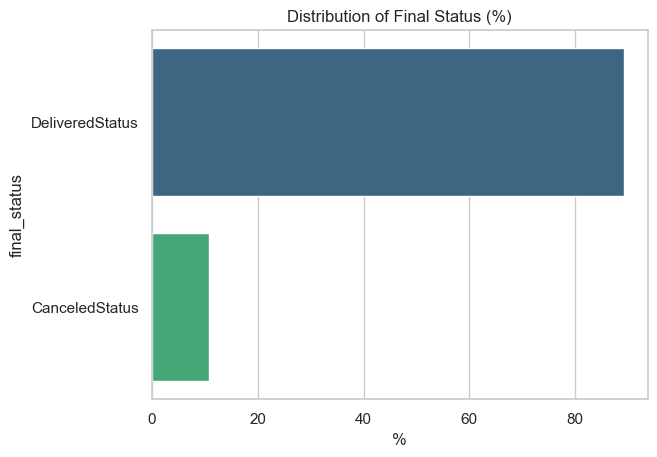

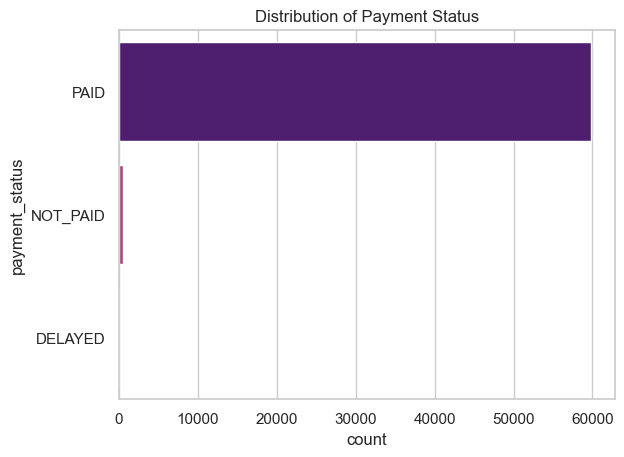

C:\Users\emartin4\AppData\Local\Temp\ipykernel_28268\452285254.py:14: UserWarning: 
The palette list has fewer values (20) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df_fake, y='country_code', hue='country_code', palette=my_palette)


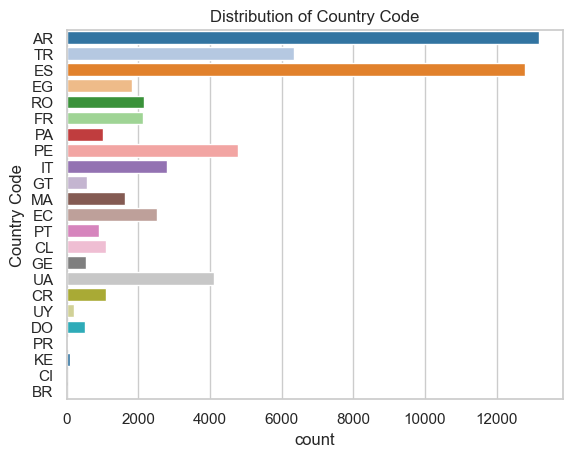

In [9]:
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

sns.countplot(data=df_fake, y='final_status', hue='final_status', palette='viridis', stat="percent")
plt.xlabel('%')
plt.title("Distribution of Final Status (%)")
plt.show()

sns.countplot(data=df_fake, y='payment_status', hue='payment_status', palette='magma')
plt.title("Distribution of Payment Status")
plt.show()

sns.countplot(data=df_fake, y='country_code', hue='country_code', palette=my_palette)
plt.ylabel("Country Code")
plt.title("Distribution of Country Code")
plt.show()


Text(0.5, 1.0, 'Distribution of €')

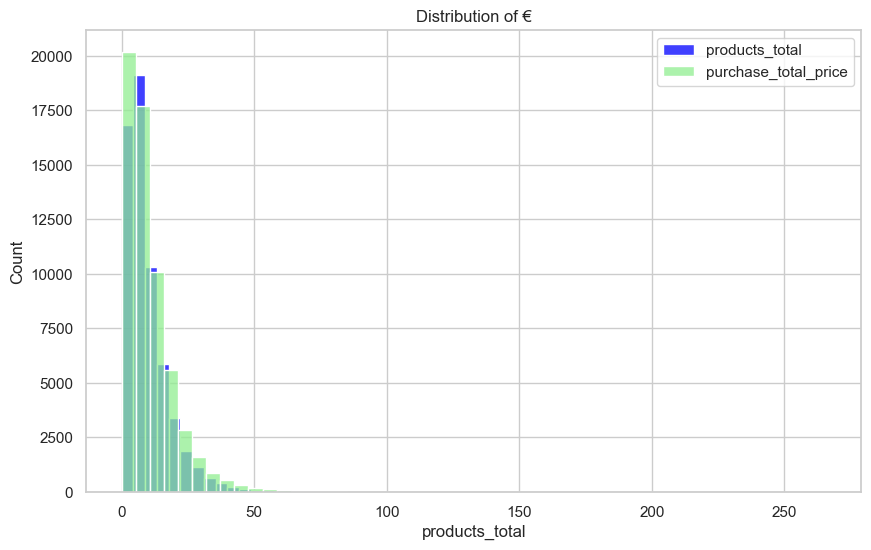

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_fake, x='products_total', bins=50, color='blue', label='products_total')
sns.histplot(data=df_fake, x='purchase_total_price', bins=50, color='lightgreen', label='purchase_total_price')
plt.legend(loc='upper right')
plt.title(f"Distribution of €")

### 1. - ¿Qué porcentaje de pedidos están subautorizados?

In [11]:
df_fake_subauthorized = df_fake[df_fake['products_total'] < df_fake['purchase_total_price']]
df_fake_subauthorized

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,price_difference,authorized
0,33557880,2019-03-10 23:59:59,AR,14200,DeliveredStatus,PAID,1,4.54,8.64,-4.10,False
4,33557765,2019-03-10 23:57:21,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,-3.62,False
5,33512273,2019-03-10 23:57:13,TR,63536,DeliveredStatus,PAID,4,1.88,1.96,-0.08,False
7,33511759,2019-03-10 23:55:21,TR,47493,DeliveredStatus,PAID,2,2.37,2.45,-0.08,False
10,33523444,2019-03-10 23:53:38,RO,72549,DeliveredStatus,PAID,2,2.05,10.17,-8.12,False
...,...,...,...,...,...,...,...,...,...,...,...
60380,31965637,2019-03-01 00:30:50,TR,44528,DeliveredStatus,PAID,1,3.44,6.89,-3.45,False
60389,32002620,2019-03-01 00:14:57,AR,62623,DeliveredStatus,PAID,2,1.79,5.36,-3.57,False
60395,31960607,2019-03-01 00:04:31,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,-0.16,False
60397,32002046,2019-03-01 00:03:06,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,-0.67,False


In [12]:
df_fake_authorized = df_fake[df_fake['products_total'] >= df_fake['purchase_total_price']]
df_fake_authorized

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,price_difference,authorized
1,33512615,2019-03-10 23:58:32,TR,28725,DeliveredStatus,PAID,1,3.76,3.76,0.00,True
2,33512451,2019-03-10 23:57:56,TR,28725,DeliveredStatus,PAID,1,2.86,2.86,0.00,True
3,33530892,2019-03-10 23:57:33,ES,19777,CanceledStatus,PAID,1,12.95,0.00,12.95,True
6,33524023,2019-03-10 23:57:06,EG,73739,DeliveredStatus,PAID,3,10.19,1.61,8.58,True
8,33511416,2019-03-10 23:54:06,TR,33400,DeliveredStatus,PAID,1,3.93,3.93,0.00,True
...,...,...,...,...,...,...,...,...,...,...,...
60392,32005602,2019-03-01 00:11:00,PE,59011,CanceledStatus,PAID,1,6.65,0.00,6.65,True
60393,31961779,2019-03-01 00:09:57,TR,34953,DeliveredStatus,PAID,1,1.80,1.80,0.00,True
60394,32002340,2019-03-01 00:09:21,AR,14455,DeliveredStatus,NOT_PAID,2,5.14,5.14,0.00,True
60396,32002079,2019-03-01 00:03:53,AR,50175,CanceledStatus,PAID,1,3.80,0.00,3.80,True


In [13]:
perc_authorized = 100*(len(df_fake_authorized) / len(df_fake))
print(f"Porcentaje de pedidos autorizados: {perc_authorized:.3f}%")

Porcentaje de pedidos autorizados: 42.416%


#### Solución

In [14]:
perc_subauthorized = 100*(len(df_fake_subauthorized) / len(df_fake))
print(f"Porcentaje de pedidos subautorizados: {perc_subauthorized:.3f}%")

Porcentaje de pedidos subautorizados: 57.584%


### 2.- ¿Qué porcentaje de pedidos se autorizarían correctamente con una autorización incremental (+20%) sobre el monto en el checkout?


In [15]:
df_fake_authorized_inc = df_fake[df_fake['products_total'] * 1.2 >= df_fake['purchase_total_price']]
df_fake_authorized_inc

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,price_difference,authorized
1,33512615,2019-03-10 23:58:32,TR,28725,DeliveredStatus,PAID,1,3.76,3.76,0.00,True
2,33512451,2019-03-10 23:57:56,TR,28725,DeliveredStatus,PAID,1,2.86,2.86,0.00,True
3,33530892,2019-03-10 23:57:33,ES,19777,CanceledStatus,PAID,1,12.95,0.00,12.95,True
5,33512273,2019-03-10 23:57:13,TR,63536,DeliveredStatus,PAID,4,1.88,1.96,-0.08,False
6,33524023,2019-03-10 23:57:06,EG,73739,DeliveredStatus,PAID,3,10.19,1.61,8.58,True
...,...,...,...,...,...,...,...,...,...,...,...
60395,31960607,2019-03-01 00:04:31,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,-0.16,False
60396,32002079,2019-03-01 00:03:53,AR,50175,CanceledStatus,PAID,1,3.80,0.00,3.80,True
60397,32002046,2019-03-01 00:03:06,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,-0.67,False
60398,32001950,2019-03-01 00:01:01,AR,62504,CanceledStatus,PAID,1,4.91,0.00,4.91,True


#### Solución

In [16]:
perc_authorized_inc = 100*(len(df_fake_authorized_inc) / len(df_fake))
print(f"Porcentaje de pedidos autorizados con una autorización incremental (+20%) sobre el monto en el checkout: {perc_authorized_inc:.3f}%")

Porcentaje de pedidos autorizados con una autorización incremental (+20%) sobre el monto en el checkout: 69.035%


Antes de la autorización incremental (+20%) sobre el monto del checkout, el porcentaje de pedidos autorizados era 42.416%, ahora al haber hecho el incremento, hemos pasado a  69.035%.

### 3.- ¿Hay diferencias cuando se dividen por país?

In [17]:
df_fake_subauthorized_per_country = df_fake_subauthorized.groupby('country_code').size().reset_index(name='count')
df_fake_subauthorized_per_country['%'] = 100*(df_fake_subauthorized_per_country['count'] / len(df_fake))
df_fake_subauthorized_per_country.sort_values(by='%', ascending=False, inplace=True)
df_fake_subauthorized_per_country

,country_code,count,%
0,AR,7994,13.235099
8,ES,7965,13.187086
20,TR,3216,5.324503
16,PE,2675,4.428808
21,UA,2003,3.316225
6,EC,1611,2.667219
12,IT,1553,2.571192
9,FR,1402,2.321192
7,EG,1150,1.903974
19,RO,1006,1.665563


C:\Users\emartin4\AppData\Local\Temp\ipykernel_28268\3980315943.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_fake_subauthorized_per_country, x='%', y='country_code', palette=my_palette)
C:\Users\emartin4\AppData\Local\Temp\ipykernel_28268\3980315943.py:1: UserWarning: 
The palette list has fewer values (20) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_fake_subauthorized_per_country, x='%', y='country_code', palette=my_palette)


Text(0.5, 1.0, '% Pedidos subautorizados por País')

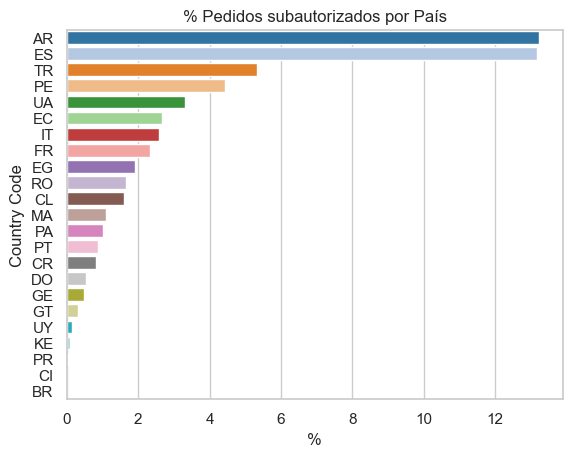

In [18]:
sns.barplot(data=df_fake_subauthorized_per_country, x='%', y='country_code', palette=my_palette)
plt.ylabel("Country Code")
plt.title("% Pedidos subautorizados por País")

In [19]:
df_fake_authorized_inc_per_country = df_fake_authorized_inc.groupby('country_code').size().reset_index(name='count')
df_fake_authorized_inc_per_country['%'] = 100*(df_fake_authorized_inc_per_country['count'] / len(df_fake))
df_fake_authorized_inc_per_country.sort_values(by='%', ascending=False, inplace=True)
df_fake_authorized_inc_per_country

,country_code,count,%
8,ES,9156,15.158940
0,AR,8758,14.500000
20,TR,4373,7.240066
16,PE,3737,6.187086
21,UA,2993,4.955298
12,IT,1968,3.258278
6,EC,1570,2.599338
19,RO,1564,2.589404
9,FR,1438,2.380795
14,MA,1265,2.094371


C:\Users\emartin4\AppData\Local\Temp\ipykernel_28268\1474686751.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_fake_authorized_inc_per_country, x='%', y='country_code', palette=my_palette)
C:\Users\emartin4\AppData\Local\Temp\ipykernel_28268\1474686751.py:1: UserWarning: 
The palette list has fewer values (20) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_fake_authorized_inc_per_country, x='%', y='country_code', palette=my_palette)


Text(0.5, 1.0, '% Pedidos subautorizados (+20%) por País')

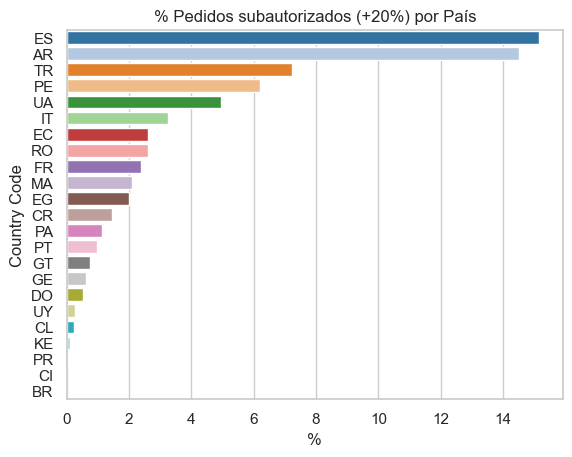

In [20]:
sns.barplot(data=df_fake_authorized_inc_per_country, x='%', y='country_code', palette=my_palette)
plt.ylabel("Country Code")
plt.title("% Pedidos subautorizados (+20%) por País")

#### Solución

Si tenemos en cuenta la comparación incluyendo y sin incluir el incremento del 20% teniendo en cuenta el país, 
> - Sin incluir incremento: Argentina (13.235099%) y España (13.187086%) tienen un porcentaje muy similar, siendo Argentina el mayor
> - Incluyendo incremento: España (15.158940%) supera ligeramente a Argentina (14.50%)

En ambos casos en tercer lugar se sitúa Turquía

### 4.- Para el resto de pedidos que quedarían fuera de la autorización incremental, ¿qué valores serían necesarios para capturar el monto restante?


In [21]:
# 1. Filtrar los pedidos que no se autorizarían con el 20% de incremento
df_fake_subauthorized_inc = df_fake[df_fake['products_total'] * 1.2 < df_fake['purchase_total_price']]
df_fake_subauthorized_inc

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,price_difference,authorized
0,33557880,2019-03-10 23:59:59,AR,14200,DeliveredStatus,PAID,1,4.54,8.64,-4.10,False
4,33557765,2019-03-10 23:57:21,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,-3.62,False
10,33523444,2019-03-10 23:53:38,RO,72549,DeliveredStatus,PAID,2,2.05,10.17,-8.12,False
12,33530379,2019-03-10 23:52:20,FR,4444,DeliveredStatus,PAID,1,8.10,10.20,-2.10,False
20,33509944,2019-03-10 23:48:55,TR,44528,DeliveredStatus,PAID,2,4.42,5.73,-1.31,False
...,...,...,...,...,...,...,...,...,...,...,...
60371,32004484,2019-03-01 01:06:46,AR,33382,DeliveredStatus,PAID,2,9.83,21.44,-11.61,False
60373,31969645,2019-03-01 00:57:47,TR,44473,DeliveredStatus,PAID,1,3.28,6.56,-3.28,False
60374,31968802,2019-03-01 00:51:19,TR,52885,DeliveredStatus,PAID,1,2.46,5.25,-2.79,False
60380,31965637,2019-03-01 00:30:50,TR,44528,DeliveredStatus,PAID,1,3.44,6.89,-3.45,False


In [22]:
# 2. Calcular el monto restante necesario para cubrir el precio total de compra
df_fake_subauthorized_inc['remaining_amount'] = df_fake_subauthorized_inc['purchase_total_price'] - (df_fake_subauthorized_inc['products_total'] * 1.2)
# Mostrar los resultados
df_fake_subauthorized_inc[['purchase_total_price', 'products_total', 'remaining_amount']]

C:\Users\emartin4\AppData\Local\Temp\ipykernel_28268\1419533181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_subauthorized_inc['remaining_amount'] = df_fake_subauthorized_inc['purchase_total_price'] - (df_fake_subauthorized_inc['products_total'] * 1.2)


,purchase_total_price,products_total,remaining_amount
0,8.64,4.54,3.192
4,6.48,2.86,3.048
10,10.17,2.05,7.710
12,10.20,8.10,0.480
20,5.73,4.42,0.426
...,...,...,...
60371,21.44,9.83,9.644
60373,6.56,3.28,2.624
60374,5.25,2.46,2.298
60380,6.89,3.44,2.762


In [23]:
df_fake_subauthorized_inc['remaining_amount'].describe()

count    1.870300e+04
mean     4.739806e+00
std      8.536864e+00
min      4.440892e-16
25%      9.740000e-01
50%      2.512000e+00
75%      5.380000e+00
max      2.641820e+02
Name: remaining_amount, dtype: float64

Text(0.5, 1.0, 'Distribution of Remaining Amount')

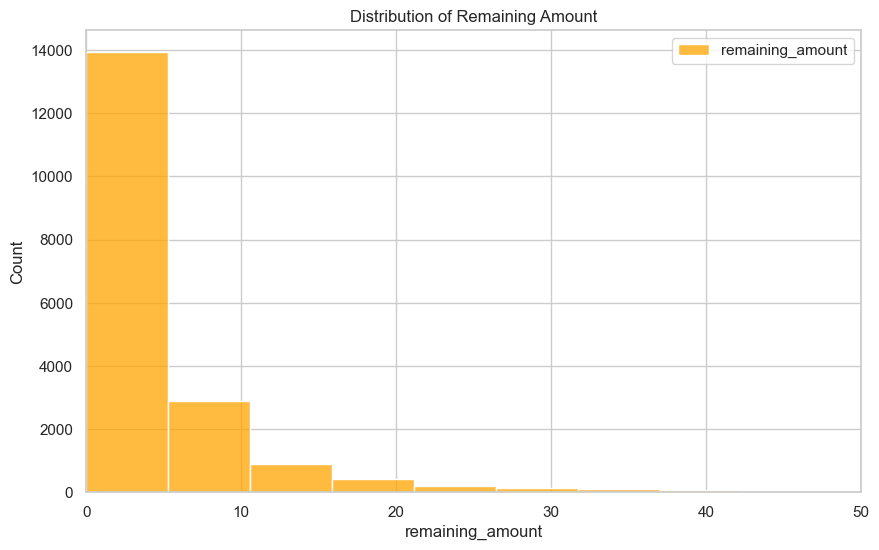

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_fake_subauthorized_inc, x='remaining_amount', bins=50, color='orange', label='remaining_amount')
plt.legend(loc='upper right')
plt.xlim([0,50])
plt.title(f"Distribution of Remaining Amount")

#### Solución

Para el resto de pedidos que quedarían fuera de la autorización incremental, se han calculado los valores que serían necesarios para capturar el monto restante en la columna **remaining_amount**, de la cual hemos obtenido el histograma que se muestra previamente (el cual hemos acotado entre 0 y 50 para una mejor interpretación de los resultados).

**remaining_amount** nos indica el monto exacto necesario para cubrir el precio total de compra para cada pedido que quedó fuera de la autorización con el incremento del 20%.

### 5.- ¿Qué tiendas son las más problemáticas en términos de pedidos y valor monetario?


In [25]:
df_fake_subauthorized

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,price_difference,authorized
0,33557880,2019-03-10 23:59:59,AR,14200,DeliveredStatus,PAID,1,4.54,8.64,-4.10,False
4,33557765,2019-03-10 23:57:21,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,-3.62,False
5,33512273,2019-03-10 23:57:13,TR,63536,DeliveredStatus,PAID,4,1.88,1.96,-0.08,False
7,33511759,2019-03-10 23:55:21,TR,47493,DeliveredStatus,PAID,2,2.37,2.45,-0.08,False
10,33523444,2019-03-10 23:53:38,RO,72549,DeliveredStatus,PAID,2,2.05,10.17,-8.12,False
...,...,...,...,...,...,...,...,...,...,...,...
60380,31965637,2019-03-01 00:30:50,TR,44528,DeliveredStatus,PAID,1,3.44,6.89,-3.45,False
60389,32002620,2019-03-01 00:14:57,AR,62623,DeliveredStatus,PAID,2,1.79,5.36,-3.57,False
60395,31960607,2019-03-01 00:04:31,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,-0.16,False
60397,32002046,2019-03-01 00:03:06,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,-0.67,False


In [26]:
df_fake_subauthorized_per_store= df_fake_subauthorized.groupby('store_address').size().reset_index(name='count')
df_fake_subauthorized_per_store['%'] = 100*(df_fake_subauthorized_per_store['count'] / len(df_fake))
df_fake_subauthorized_per_store.sort_values(by='%', ascending=False, inplace=True)
df_fake_subauthorized_per_store

,store_address,count,%
844,28671,448,0.741722
849,28712,217,0.359272
833,28286,204,0.337748
264,14455,179,0.296358
146,11694,160,0.264901
...,...,...,...
4552,9545,1,0.001656
4551,9528,1,0.001656
4550,9471,1,0.001656
20,10288,1,0.001656


C:\Users\emartin4\AppData\Local\Temp\ipykernel_28268\2042095782.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_fake_subauthorized_per_store.head(10), x='count', y='store_address', palette='viridis', orient='h')


Text(0.5, 1.0, 'TOP 10 - Count Subauthorized Orders by Store')

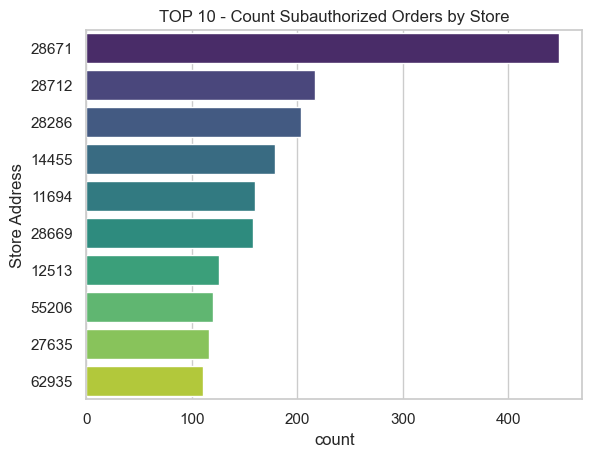

In [27]:
sns.barplot(data=df_fake_subauthorized_per_store.head(10), x='count', y='store_address', palette='viridis', orient='h')
plt.ylabel("Store Address")
plt.title("TOP 10 - Count Subauthorized Orders by Store")

In [28]:
df_fake_subauthorized_per_store_country = df_fake_subauthorized.groupby(['country_code','store_address']).size().reset_index(name='count')
df_fake_subauthorized_per_store_country['%'] = 100*(df_fake_subauthorized_per_store_country['count'] / len(df_fake))
df_fake_subauthorized_per_store_country.sort_values(by='%', ascending=False, inplace=True)
df_fake_subauthorized_per_store_country

,country_code,store_address,count,%
2057,ES,28671,448,0.741722
2061,ES,28712,217,0.359272
113,AR,28286,204,0.337748
28,AR,14455,179,0.296358
3208,PE,11694,160,0.264901
...,...,...,...,...
3303,PE,51287,1,0.001656
3298,PE,51253,1,0.001656
3320,PE,51823,1,0.001656
4559,UY,60724,1,0.001656


Text(0.5, 1.0, 'TOP 10 - Count Subauthorized Orders by Store')

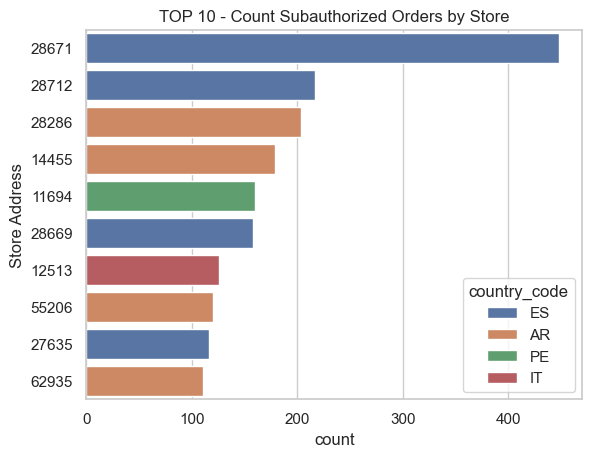

In [29]:
sns.barplot(data=df_fake_subauthorized_per_store_country.head(10), x='count', y='store_address', hue='country_code', orient='h')
plt.ylabel("Store Address")
plt.title("TOP 10 - Count Subauthorized Orders by Store")

In [30]:
f"TOP 10 - Stores with more Subauthorized Orders: {df_fake_subauthorized_per_store_country.store_address.head(10).tolist()}"

"TOP 10 - Stores with more Subauthorized Orders: ['28671', '28712', '28286', '14455', '11694', '28669', '12513', '55206', '27635', '62935']"

In [31]:
df_fake_subauthorized_per_store_country_minpricediff = df_fake_subauthorized.groupby(['country_code','store_address'])['price_difference'].agg('min').reset_index(name='min_price_difference')
df_fake_subauthorized_per_store_country_minpricediff.sort_values(by='min_price_difference', ascending=True, inplace=True)
df_fake_subauthorized_per_store_country_minpricediff

,country_code,store_address,min_price_difference
3172,PA,65896,-264.36
3171,PA,65895,-255.91
3165,PA,52914,-254.93
3190,PA,72250,-214.94
1836,ES,1584,-203.90
...,...,...,...
2171,ES,47794,-0.01
1727,EG,72789,-0.01
4093,TR,71359,-0.01
1357,EC,54006,-0.01


Text(0.5, 1.0, 'TOP 10 - Biggest Price Differences of Subauthorized Orders by Store and Country')

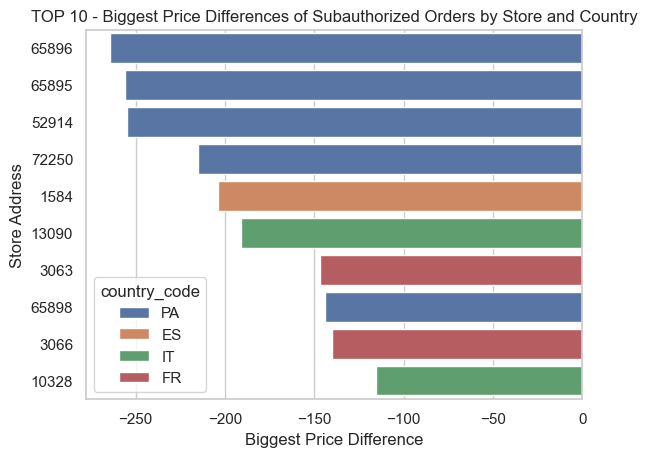

In [32]:
sns.barplot(data=df_fake_subauthorized_per_store_country_minpricediff.head(10), x='min_price_difference', y='store_address', hue='country_code', orient='h')
plt.ylabel("Store Address")
plt.xlabel('Biggest Price Difference')
plt.title("TOP 10 - Biggest Price Differences of Subauthorized Orders by Store and Country")

#### Conclusión

En términos de **pedidos**, las tiendas más problemáticas, entendiendo como tienda problemática aquella que tiene pedidos subautorizados, son:

"TOP 10 - Stores with more Subauthorized Orders: ['28671', '28712', '28286', '14455', '11694', '28669', '12513', '55206', '27635', '62935']"

De las cuales 4 de ellas pertenecen a España, 4 a Argentina, 1 a Perú y 1 a Italia


En términos de **pedidos** y **valor monetario** (o price difference), vemos en la anterior gráfica que Panamá tiene las tiendas con mayor diferencia de precio por pedido.

### 6.- Para los pedidos subautorizados, ¿hay una correlación entre la diferencia en los precios y la cancelación del pedido? En otras palabras: ¿Es más probable que se cancele un pedido a medida que aumenta la diferencia de precio?


#### Para todos los pedidos:

Para todos los pedidos: 

> El 89.2434% son DeliveredStatus

> El 10.7566% son CanceledStatus

(Figura obtenida en el EDA)

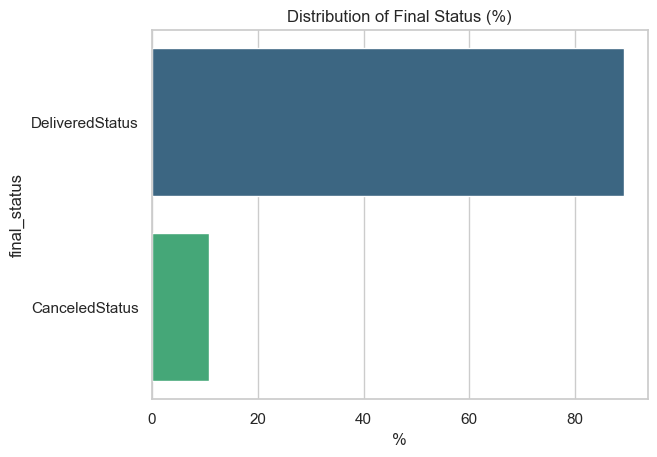

In [33]:
df_fake['final_status'].value_counts(normalize=True) # %

final_status
DeliveredStatus    0.892434
CanceledStatus     0.107566
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Distribution of Price Difference in all orders')

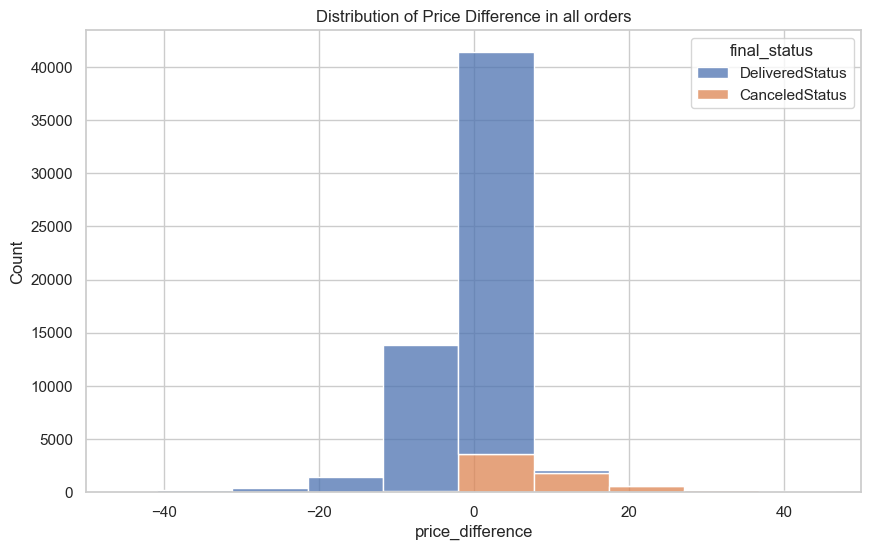

In [34]:
# Para todos los pedidos:
plt.figure(figsize=(10,6))
sns.histplot(data=df_fake, x='price_difference', bins=50, hue='final_status', multiple="stack")
plt.xlim([-50,50])
plt.title(f"Distribution of Price Difference in all orders")

#### Para los pedidos subautorizados:

In [35]:
df_fake

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,price_difference,authorized
0,33557880,2019-03-10 23:59:59,AR,14200,DeliveredStatus,PAID,1,4.54,8.64,-4.10,False
1,33512615,2019-03-10 23:58:32,TR,28725,DeliveredStatus,PAID,1,3.76,3.76,0.00,True
2,33512451,2019-03-10 23:57:56,TR,28725,DeliveredStatus,PAID,1,2.86,2.86,0.00,True
3,33530892,2019-03-10 23:57:33,ES,19777,CanceledStatus,PAID,1,12.95,0.00,12.95,True
4,33557765,2019-03-10 23:57:21,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,-3.62,False
...,...,...,...,...,...,...,...,...,...,...,...
60395,31960607,2019-03-01 00:04:31,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,-0.16,False
60396,32002079,2019-03-01 00:03:53,AR,50175,CanceledStatus,PAID,1,3.80,0.00,3.80,True
60397,32002046,2019-03-01 00:03:06,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,-0.67,False
60398,32001950,2019-03-01 00:01:01,AR,62504,CanceledStatus,PAID,1,4.91,0.00,4.91,True


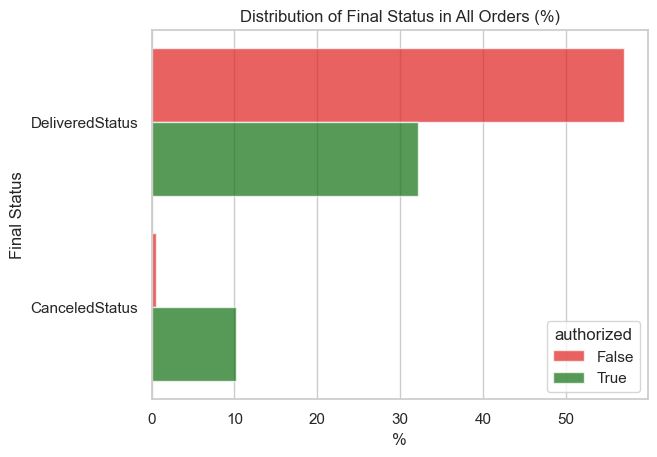

In [36]:
red_green_palette = sns.color_palette(["red", "green"])
sns.countplot(data=df_fake, y='final_status', hue='authorized', palette=red_green_palette, stat="percent", alpha=0.7)
plt.xlabel('%')
plt.title("Distribution of Final Status in All Orders (%)")
plt.ylabel('Final Status')
plt.show()

In [37]:
df_fake[['final_status','authorized']].value_counts(normalize=True, sort=False)

final_status     authorized
CanceledStatus   False         0.005596
                 True          0.101970
DeliveredStatus  False         0.570248
                 True          0.322185
Name: proportion, dtype: float64

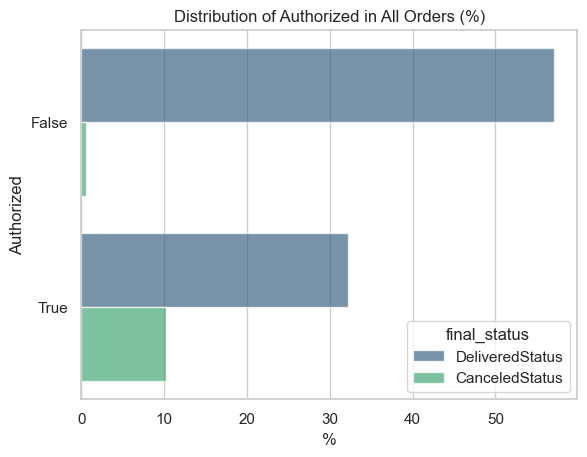

In [38]:
sns.countplot(data=df_fake, y='authorized', hue='final_status', palette='viridis', stat="percent", alpha=0.7)
plt.xlabel('%')
plt.title("Distribution of Authorized in All Orders (%)")
plt.ylabel('Authorized')
plt.show()

In [39]:
df_fake[['authorized','final_status']].value_counts(normalize=True, sort=False)

authorized  final_status   
False       CanceledStatus     0.005596
            DeliveredStatus    0.570248
True        CanceledStatus     0.101970
            DeliveredStatus    0.322185
Name: proportion, dtype: float64

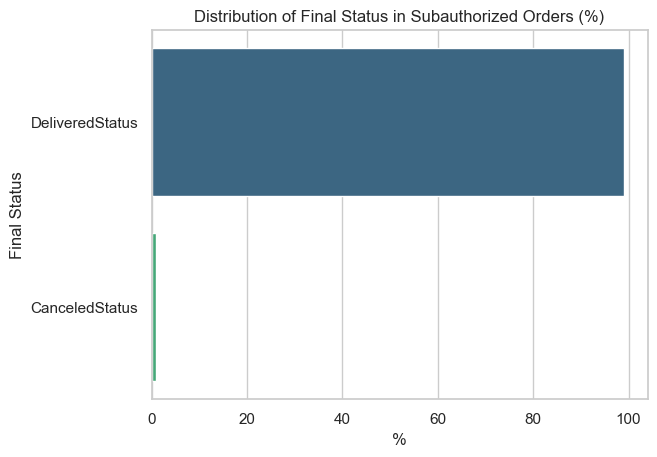

In [40]:
sns.countplot(data=df_fake_subauthorized, y='final_status', hue='final_status', palette='viridis', stat="percent")
plt.xlabel('%')
plt.title("Distribution of Final Status in Subauthorized Orders (%)")
plt.ylabel('Final Status')
plt.show()

In [41]:
df_fake_subauthorized['final_status'].value_counts(normalize=True) # %
# El 0.9718% de los pedidos subautorizados están con estado CanceledStatus

final_status
DeliveredStatus    0.990282
CanceledStatus     0.009718
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Distribution of Price Difference in subauthorized orders')

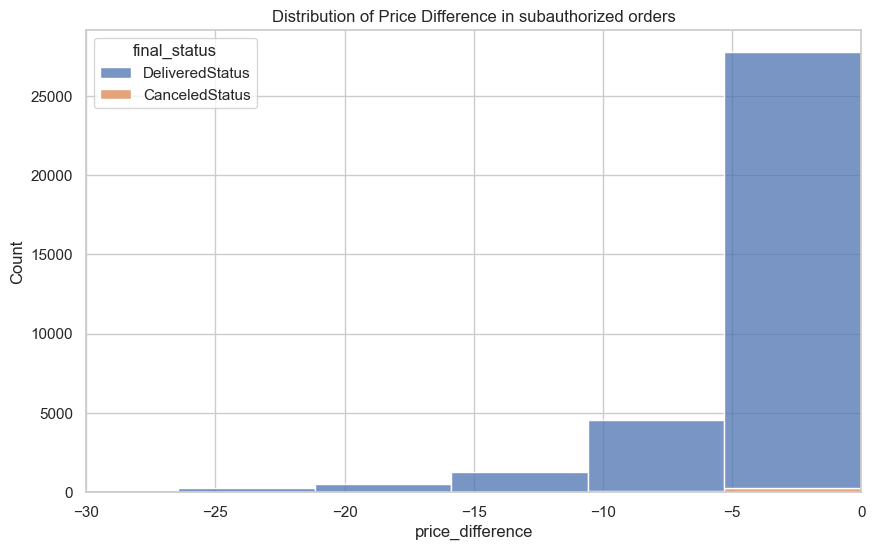

In [42]:
# Para todos los pedidos:
plt.figure(figsize=(10,6))
sns.histplot(data=df_fake_subauthorized, x='price_difference', bins=50, hue='final_status', multiple="stack")
plt.xlim([-30,0])
plt.title(f"Distribution of Price Difference in subauthorized orders")

In [43]:
# Crear una columna binaria que indique si el pedido fue cancelado (por ejemplo, 1 = cancelado, 0 = no cancelado)
df_fake_subauthorized['is_canceled'] = df_fake_subauthorized['final_status'].apply(lambda x: 1 if x == 'CanceledStatus' else 0)

C:\Users\emartin4\AppData\Local\Temp\ipykernel_28268\238779556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_subauthorized['is_canceled'] = df_fake_subauthorized['final_status'].apply(lambda x: 1 if x == 'CanceledStatus' else 0)


In [44]:
# Calcular la correlación entre la diferencia de precios y la cancelación
correlation_matrix = df_fake_subauthorized[['price_difference', 'is_canceled']].corr()
correlation = correlation_matrix.iloc[0, 1]
print(f"La correlación entre la diferencia de precios y la cancelación es: {correlation}")

La correlación entre la diferencia de precios y la cancelación es: -0.12372105249553896


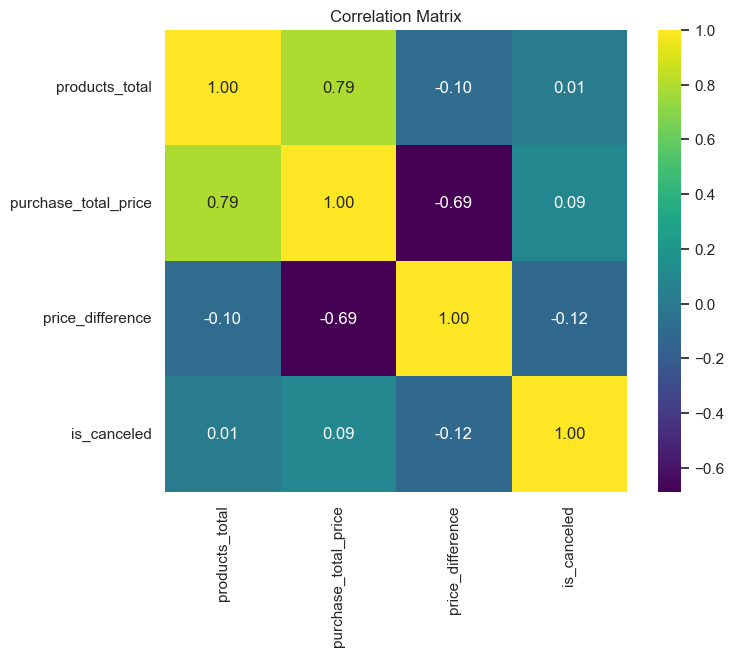

In [45]:
correlation_matrix = df_fake_subauthorized[['products_total', 'purchase_total_price', 'price_difference', 'is_canceled']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [46]:
df_fake_subauthorized.groupby('final_status')['price_difference'].describe()

,count,mean,std,min,25%,50%,75%,max
final_status,,,,,,,,
CanceledStatus,338.0,-12.447249,34.679177,-264.36,-6.585,-2.23,-0.8,-0.01
DeliveredStatus,34443.0,-3.636929,6.062980,-203.90,-4.370,-1.73,-0.6,-0.01


##### Conclusión

Si observamos la matriz de correlación, podemos concluir que una correlación de -0.12 indica una relación muy débil, y en este caso, la diferencia de precio no parece ser un factor determinante en la cancelación de los pedidos, por lo que pueden haberse cancelado por otros motivos adicionales.

Esta afirmación también se concluye en los gráficos previos, ya que vemos que de todos los pedidos subautorizados, tan solo un 0.9718% tienen estado CanceledStatus.

A su vez, en la tabla obtenida con el describe() observamos que en media, los CanceledStatus tienen más diferencia de precio, pero solo hay una diferencia de 7€ con los DeliveredStatus, por lo que no es muy relevante. Sí que se observa que en los CanceledStatus hay una desviación de 34.67. Al observar el mínimo vemos que es muy parecido entre CanceledStatus (-264.36) y DeliveredStatus (-203.90)